In [1]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pltfont
pltfont.auto()

✅ 현재 폰트 적용됨: Arial Unicode MS


In [2]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [3]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [4]:
inventory_items_file_path = data_path + "/inventory_items_gzip.parquet"
inventory_items_df = pd.read_parquet(inventory_items_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [5]:
inventory_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487586 entries, 0 to 487585
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              487586 non-null  Int64              
 1   product_id                      487586 non-null  Int64              
 2   created_at                      487586 non-null  datetime64[ns, UTC]
 3   sold_at                         180742 non-null  datetime64[ns, UTC]
 4   product_sku                     487586 non-null  object             
 5   product_distribution_center_id  487586 non-null  Int64              
 6   product_department              487586 non-null  object             
dtypes: Int64(3), datetime64[ns, UTC](2), object(2)
memory usage: 27.4+ MB


In [6]:
inventory_items_df.describe(include='all',datetime_is_numeric=True)

,id,product_id,created_at,sold_at,product_sku,product_distribution_center_id,product_department
count,487586.0,487586.0,487586,180742,487586,487586.0,487586
unique,<NA>,<NA>,NaN,NaN,29048,<NA>,2
top,<NA>,<NA>,NaN,NaN,4B1D35D72137CACE2F9546CA80EEE53F,<NA>,Women
freq,<NA>,<NA>,NaN,NaN,53,<NA>,245086
mean,243793.5,15243.322296,2023-04-23 21:26:43.354500608+00:00,2024-02-12 20:50:03.705213952+00:00,NaN,5.006875,NaN
min,1.0,1.0,2018-11-23 00:17:13+00:00,2019-01-13 15:19:13+00:00,NaN,1.0,NaN
25%,121897.25,7974.0,2021-11-25 16:20:48.750000128+00:00,2023-03-19 06:26:50.500000+00:00,NaN,2.0,NaN
50%,243793.5,15904.0,2023-07-12 08:34:59+00:00,2024-07-24 03:23:47.500000+00:00,NaN,5.0,NaN
75%,365689.75,22510.0,2024-11-02 10:32:00+00:00,2025-05-12 00:32:33+00:00,NaN,8.0,NaN
max,487586.0,29120.0,2025-10-12 07:00:39.657418+00:00,2025-10-12 19:08:45.657725+00:00,NaN,10.0,NaN


In [7]:
inventory_items_df.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           306844
product_sku                            0
product_distribution_center_id         0
product_department                     0
dtype: int64

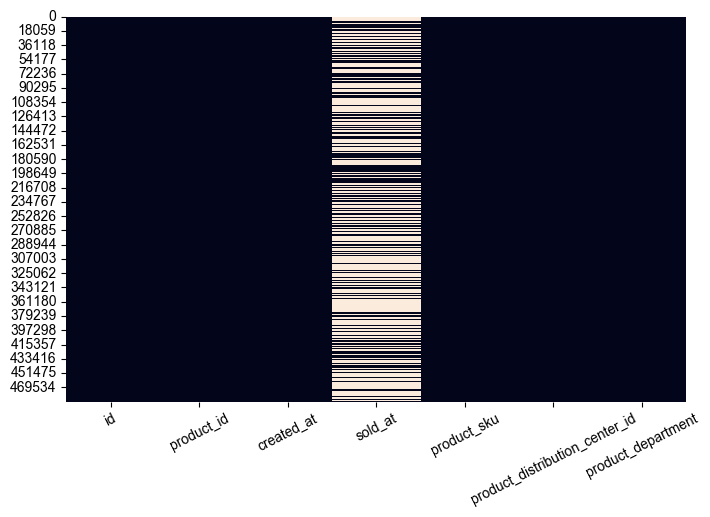

In [8]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(inventory_items_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()